Decision Trees & Random Forests

1. Read your Titanic dataset as usual: Create a training set and a testing set then apply decision tree. 

In [1]:
#Importing our dataset from csv file
import pandas as pd 
dataset=pd.read_csv("C:/Users/rania/OneDrive/Bureau/GoMyCode_AI_Training/titanic-passengers.csv", sep=";")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data

data=preprocess_data(dataset)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,G6,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,G6,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,G6,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,G6,S


In [2]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [3]:
#features extraction
x=data[["Pclass","Sex","Age","SibSp","Parch"]]
y=data["Survived"].values

#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#Applying the algorithm
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7821229050279329


[Text(0.5, 0.875, 'X[1] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(0.25, 0.625, 'X[0] <= 2.5\ngini = 0.39\nsamples = 252\nvalue = [67, 185]'),
 Text(0.125, 0.375, 'X[2] <= 2.5\ngini = 0.1\nsamples = 133\nvalue = [7, 126]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.125, 'gini = 0.087\nsamples = 132\nvalue = [6, 126]'),
 Text(0.375, 0.375, 'X[4] <= 1.5\ngini = 0.5\nsamples = 119\nvalue = [60, 59]'),
 Text(0.3125, 0.125, 'gini = 0.49\nsamples = 91\nvalue = [39, 52]'),
 Text(0.4375, 0.125, 'gini = 0.375\nsamples = 28\nvalue = [21, 7]'),
 Text(0.75, 0.625, 'X[0] <= 1.5\ngini = 0.296\nsamples = 460\nvalue = [377, 83]'),
 Text(0.625, 0.375, 'X[2] <= 28.5\ngini = 0.461\nsamples = 100\nvalue = [64, 36]'),
 Text(0.5625, 0.125, 'gini = 0.475\nsamples = 18\nvalue = [7, 11]'),
 Text(0.6875, 0.125, 'gini = 0.424\nsamples = 82\nvalue = [57, 25]'),
 Text(0.875, 0.375, 'X[2] <= 3.5\ngini = 0.227\nsamples = 360\nvalue = [313, 47]'),
 Text(0.8

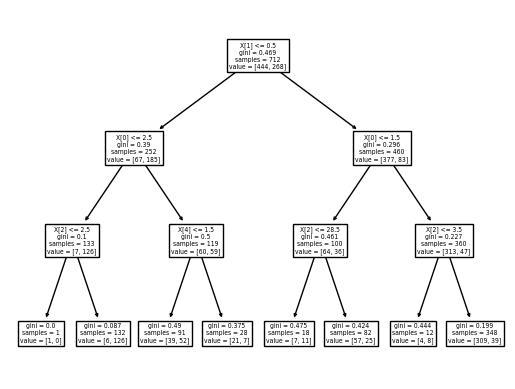

In [4]:
tree.plot_tree(clf) #plot a decision tree using scikit-learn

2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

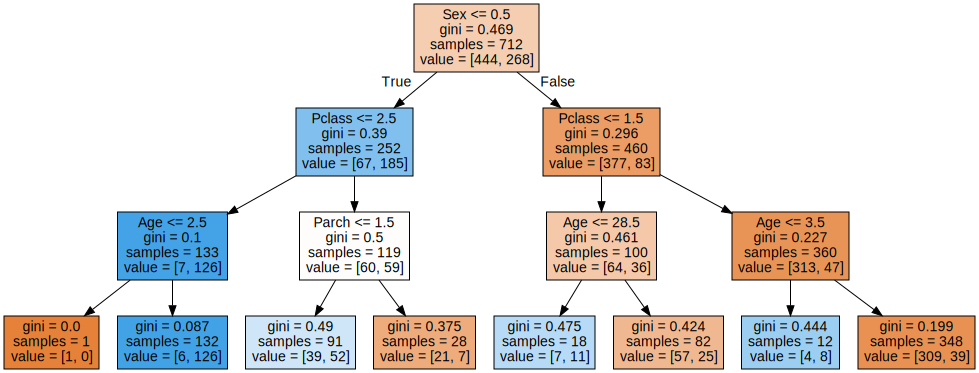

In [5]:
import graphviz #plot a decision tree using graphviz
#Dot_data
dot_data=tree.export_graphviz(clf,
                     out_file=None,
                     feature_names = x_train.columns, 
                     filled = True)
#Visualize the graph 
graph= graphviz.Source(dot_data, format="png")
graph

3. Change the decision tree parameters(at least two parameters). 

In [6]:
#Changing the parameters
clf = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes=12, criterion="entropy") 
#Entropy is a measure of information that indicates the disorder of the features with the target (measures impurity of a node). 

4. Calculate the new accuracy and compare it with the previous results. 

In [7]:
clf.fit(x_train, y_train) #train the data
y_pred=clf.predict(x_test) #test our model 
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7932960893854749


The accuracy value rose from 0.78 to 0.79 when changing the parameters.

5. Use a random forest then change the number of estimators.

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.7877094972067039


In [19]:
for n in range(20,500,20): #change the number of estimators n using the for loop
    clf=RandomForestClassifier(n_estimators=n) 
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    print("Random Forest with n_estimators =", n)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Random Forest with n_estimators = 20
Accuracy: 0.8044692737430168
Random Forest with n_estimators = 40
Accuracy: 0.7932960893854749
Random Forest with n_estimators = 60
Accuracy: 0.7821229050279329
Random Forest with n_estimators = 80
Accuracy: 0.7932960893854749
Random Forest with n_estimators = 100
Accuracy: 0.7988826815642458
Random Forest with n_estimators = 120
Accuracy: 0.7877094972067039
Random Forest with n_estimators = 140
Accuracy: 0.7932960893854749
Random Forest with n_estimators = 160
Accuracy: 0.7932960893854749
Random Forest with n_estimators = 180
Accuracy: 0.7932960893854749
Random Forest with n_estimators = 200
Accuracy: 0.7932960893854749
Random Forest with n_estimators = 220
Accuracy: 0.7932960893854749
Random Forest with n_estimators = 240
Accuracy: 0.7932960893854749
Random Forest with n_estimators = 260
Accuracy: 0.7877094972067039
Random Forest with n_estimators = 280
Accuracy: 0.7932960893854749
Random Forest with n_estimators = 300
Accuracy: 0.7988826815642458

6. Calculate the new accuracy and compare it with the previous result.

After calculating the accuracy, the best result is obtained for n=20 with a value of 0,80. 
In a nutshell, Random Forest is slightly better compared to the Decision tree. 